In [1]:
from pylab import *
%matplotlib inline
import h5py
import preprocessor as prep
import os,sys
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()
def toc():
    import time
    t = time.time() - startTime_for_tictoc
    if 'startTime_for_tictoc' in globals():
        print "Elapsed time is " + str(t) + " seconds."
        return t
    else:
        print "Toc: start time not set"

/home/alfiia/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(15077, 1, 11, 11)
float32
(15077, 1) [[[-0.58595258]]]
<HDF5 dataset "data1": shape (15077, 1, 1, 1), type "<f4">
(15077,)
[ 0.]
0.328869


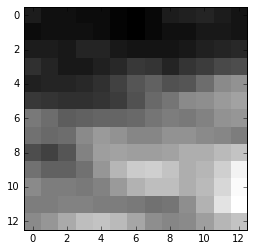

In [2]:
DATADIR = '/home/disk1/alfiia/carotid/composition/5/'
import h5py
import numpy as np

dataFileName = DATADIR+'test_intensities1.h5'
with h5py.File(dataFileName,'r') as patchFile:
    _datashape = patchFile.get('data11').shape
    print _datashape
    print patchFile.get('data11').dtype
    icase = 2000
    imshow(patchFile.get('data13')[icase,0,:,:],interpolation='nearest',cmap='gray')
    print patchFile.get('labels').shape, patchFile.get('data1')[icase,:]
    print patchFile.get('data1')
    print patchFile.get('labels')[:].flatten().shape
    print patchFile.get('labels')[icase]
    print max(patchFile.get('data11')[icase,0,:,:].flatten())

In [60]:
# create the new h5 files
import os
for sfile in sorted(os.listdir(DATADIR)):
    if not '.h5list' in sfile and not '_.h5' in sfile:
        filename, _ = os.path.splitext( os.path.basename(sfile) )
        dataFileName = DATADIR+filename+'.h5'
        outputFileName = DATADIR+filename+'_.h5'
        with h5py.File(dataFileName,'r') as patchFile:
            data1 = patchFile.get('data1')
            shape1 = patchFile.get('data1').shape
            data11 = patchFile.get('data11')
            shape11 = patchFile.get('data11').shape
            data15 = patchFile.get('data15')
            shape15 = patchFile.get('data15').shape
            data5 = patchFile.get('data5')
            shape5 = patchFile.get('data5').shape
            data13 = patchFile.get('data13')
            shape13 = patchFile.get('data13').shape
            data9 = patchFile.get('data9')
            shape9 = patchFile.get('data9').shape
            #data21 = patchFile.get('data21')
            #shape21 = patchFile.get('data21').shape
            
            _labels = patchFile.get('labels')
            labels_shape = patchFile.get('labels').shape
            labels = np.zeros(labels_shape)
            labels[:] = _labels
            labels = labels.flatten()
            
            _cases = patchFile.get('cases')
            cases_shape = patchFile.get('cases').shape
            cases = np.zeros(cases_shape)
            cases[:] = _cases
            cases = cases.flatten()
            #labels = labels.flatten()
            with h5py.File(outputFileName,'w') as outFile:
                _data = outFile.create_dataset('data1', shape = shape1, dtype='float32',compression="gzip")
                _data[:]=data1
                _data = outFile.create_dataset('data11', shape = shape11, dtype='float32',compression="gzip")
                _data[:]=data11
                _data = outFile.create_dataset('data15', shape = shape15, dtype='float32',compression="gzip")
                _data[:]=data15
                _data = outFile.create_dataset('data9', shape = shape9, dtype='float32',compression="gzip")
                _data[:]=data9
                _data = outFile.create_dataset('data13', shape = shape13, dtype='float32',compression="gzip")
                _data[:]=data13
                #_data = outFile.create_dataset('data21', shape = shape21, dtype='float32',compression="gzip")
                #_data[:]=data21
                _data = outFile.create_dataset('data5', shape = shape5, dtype='float32',compression="gzip")
                _data[:]=data5
                
                _labels = outFile.create_dataset('labels', data = labels,dtype='uint8',compression="gzip")
                _cases = outFile.create_dataset('cases', data = cases,dtype='uint8',compression="gzip")
#     filename, _ = os.path.splitext( os.path.basename(sfile) )
#     outputFile = DATADIR+filename+'.h5list'
#     #print outputFile
#     with open(outputFile, "w") as text_file:
#         print DATADIR+sfile
#         text_file.write(DATADIR+filename+'.h5')

(51723,)
float32
(51723, 1, 5, 5)
(51723,) [[[ 2.00604129]]]
<HDF5 dataset "data1": shape (51723, 1, 1, 1), type "<f4">
(51723,)


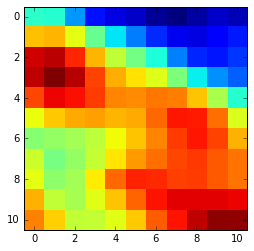

In [3]:
dataFileName = DATADIR+'train05_intensities5_.h5'

with h5py.File(dataFileName,'r') as patchFile:
    _datashape = patchFile.get('labels').shape
    print _datashape
    print patchFile.get('data11').dtype
    print patchFile.get('data5').shape
    icase = 15000
    imshow(patchFile.get('data11')[icase,0,:,:],interpolation='nearest')
    print patchFile.get('labels').shape, patchFile.get('data1')[icase,:]
    print patchFile.get('data1')
    print patchFile.get('labels')[:].flatten().shape

In [3]:
caffe_root = '/home/disk1/alfiia/caffe/'  # this file should be run from {caffe_root}/examples (otherwise change this line)

caffe_root = '/home/raunaq/TumorSegmentation/caffe/'

import sys
sys.path.insert(0, caffe_root + 'python')
import caffe 

caffe.set_device(1)
caffe.set_mode_gpu()

In [4]:
# define the nets
# TODO: negative_slope=0.01, L.Dropout(n.tanh3, dropout_ratio=0.5)


from caffe import layers as L
from caffe import params as P

# the simplest non-conv net
def net(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = True
    #wFiller = dict(type='gaussian', std = 0.0001);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data1, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    
#     n.conv1 = L.Convolution(n.data1, kernel_size=1, pad=1, num_output=50, weight_filler=wFiller)
    
#     if bBatchNorm:
#         n.bnorm1 = L.BatchNorm(n.conv1)
#         n.relu1 = L.ReLU(n.bnorm1, in_place=True)
#     else:
#         n.relu1 = L.ReLU(n.conv1, in_place=True)
        
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    
    n.fc2 = L.InnerProduct(n.data1, num_output=256, weight_filler=wFiller)
    n.relu2 = L.ReLU(n.fc2, in_place=True,negative_slope=NSlope)
    
    n.fc3 = L.InnerProduct(n.relu2, num_output=num_classes, weight_filler=wFiller)
    
    
    #n.prob = L.Softmax(n.fc3)
    
    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc3, n.labels)
    return n.to_proto()

# single-path net for data5
def net_5(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    #wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data5, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    
    n.conv1 = L.Convolution(n.data5, kernel_size=3, pad=0, num_output=32, weight_filler=wFiller)
    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1, local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
        
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    n.conv2 = L.Convolution(n.relu1, kernel_size=3, pad=0, num_output=32, weight_filler=wFiller)
    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2, local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
    
    n.fc2 = L.InnerProduct(n.relu2, num_output=128, weight_filler=wFiller)
    n.relu2 = L.ReLU(n.fc2, in_place=True,negative_slope=NSlope)
    
    n.fc3 = L.InnerProduct(n.relu2, num_output=num_classes, weight_filler=wFiller)
    
    
    #n.prob = L.Softmax(n.fc3)
    
    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc3, n.labels)
    return n.to_proto()

# single-path net for data11
def net_11(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = True
    wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    #wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data11, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    
    n.conv1 = L.Convolution(n.data11, kernel_size=5, pad=0, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
        
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    n.conv2 = L.Convolution(n.relu1, kernel_size=5, pad=0, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
    
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=0, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    
    
#     n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=0, num_output=64, weight_filler=wFiller)    
#     if bBatchNorm:
#         n.bnorm4 = L.BatchNorm(n.conv4)
#         n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
#     else:
#         n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
        
       
    #     n.conv5 = L.Convolution(n.relu4, kernel_size=3, pad=0, num_output=64, weight_filler=wFiller)    
#     if bBatchNorm:
#         n.bnorm5 = L.BatchNorm(n.conv5)
#         n.relu5 = L.ReLU(n.bnorm5, in_place=True,negative_slope=NSlope)
#     else:
#         n.relu5 = L.ReLU(n.conv5, in_place=True,negative_slope=NSlope)
        
    
    n.fc2 = L.InnerProduct(n.relu3, num_output=128, weight_filler=wFiller)
        
#     n.relu2 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)
#     if btrain:
#         n.drop2 = L.Dropout(n.relu2, in_place=False, dropout_ratio=0.5)
#         n.fc3 = L.InnerProduct(n.drop2, num_output=num_classes, weight_filler=wFiller)
#     else:
#         n.fc3 = L.InnerProduct(n.relu2, num_output=num_classes, weight_filler=wFiller)
    
    n.fc3 = L.InnerProduct(n.relu2, num_output=num_classes, weight_filler=wFiller)
    
    
    #n.prob = L.Softmax(n.fc3)
    
    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc3, n.labels)
    return n.to_proto()

# single-path net for data11
def net_15(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False#True
    wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data15, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    n.conv1 = L.Convolution(n.data15, kernel_size=7, pad=0, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
#     n.pool1 = L.Pooling(n.relu1, kernel_size=3, stride=1, pool=P.Pooling.MAX)
    
    
    n.conv2 = L.Convolution(n.relu1, kernel_size=5, pad=0, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
    
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=0, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=0, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop1 = L.Dropout(n.relu4, in_place=True, dropout_ratio=0.5)
        n.fc2 = L.InnerProduct(n.drop1, num_output=128, weight_filler=wFiller)
    else:
        n.fc2 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)
        
    #n.fc2 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)
        
    n.relu2 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    
    n.fc3 = L.InnerProduct(n.relu2, num_output=num_classes, weight_filler=wFiller)
    

    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc3, n.labels)
    return n.to_proto()


# single-path net for data15 - to be deleted
def net_15_(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    #wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data15, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    n.conv1 = L.Convolution(n.data15, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
#     n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    
    n.conv2 = L.Convolution(n.relu1, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
    
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
        
    n.fc1 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)        
    n.relufc1 = L.ReLU(n.fc1,in_place=True, negative_slope=NSlope)
    if btrain:
        n.drop1 = L.Dropout(n.fc1, in_place=True, dropout_ratio=0.5)
        n.fc2 = L.InnerProduct(n.drop1, num_output=128, weight_filler=wFiller)
    else:
        n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)
    
    #n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)        
    n.relu5 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    if btrain:
        n.drop2 = L.Dropout(n.relu5, in_place=True, dropout_ratio=0.5)
        n.fc3 = L.InnerProduct(n.drop2, num_output=128, weight_filler=wFiller)
    else:
        n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)
    
    #n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)        
    n.relu6 = L.ReLU(n.fc3,in_place=True, negative_slope=NSlope)
    
    n.fc4 = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=wFiller)
    

    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc4, n.labels)
    return n.to_proto()

# the simplest conv-net
def net2(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    #wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data11, n.data5, n.labels = L.Data( type='HDF5Data',  ntop=3, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    n.conv1 = L.Convolution(n.data11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
#     n.pool1 = L.Pooling(n.relu1, kernel_size=3, stride=1, pool=P.Pooling.MAX)
    
    
    n.conv2 = L.Convolution(n.relu1, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
    
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
        
    n.fc1 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)        
    n.relufc1 = L.ReLU(n.fc1,in_place=True, negative_slope=NSlope)
    if btrain:
        n.drop1 = L.Dropout(n.fc1, in_place=True, dropout_ratio=0.5)
        n.fc2 = L.InnerProduct(n.drop1, num_output=128, weight_filler=wFiller)
    else:
        n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)
        
    n.relu5 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    # second path
    n.conv1_2 = L.Convolution(n.data5, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1_2 = L.LRN(n.conv1_2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1_2 = L.ReLU(n.bnorm1_2, in_place=True,negative_slope=NSlope)
    else:
        n.relu1_2 = L.ReLU(n.conv1_2, in_place=True,negative_slope=NSlope)
    
#     n.pool1 = L.Pooling(n.relu1, kernel_size=3, stride=1, pool=P.Pooling.MAX)
    
    
    n.conv2_2 = L.Convolution(n.relu1_2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2_2 = L.LRN(n.conv2_2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2_2 = L.ReLU(n.bnorm2_2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2_2 = L.ReLU(n.conv2_2, in_place=True,negative_slope=NSlope)
    
        
    n.conv3_2 = L.Convolution(n.relu2_2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3_2 = L.LRN(n.conv3_2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3_2 = L.ReLU(n.bnorm3_2, in_place=True,negative_slope=NSlope)
    else:
        n.relu3_2 = L.ReLU(n.conv3_2, in_place=True,negative_slope=NSlope)
    
    n.conv4_2 = L.Convolution(n.relu3_2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4_2 = L.LRN(n.conv4_2, local_size=1, alpha=1e-4, beta=0.75)
        n.relu4_2 = L.ReLU(n.bnorm4_2, in_place=True,negative_slope=NSlope)
    else:
        n.relu4_2 = L.ReLU(n.conv4_2, in_place=True,negative_slope=NSlope)
        
    n.fc1_2 = L.InnerProduct(n.relu4_2, num_output=128, weight_filler=wFiller)        
    n.relufc1_2 = L.ReLU(n.fc1_2,in_place=True, negative_slope=NSlope)
    if btrain:
        n.drop1_2 = L.Dropout(n.fc1_2, in_place=True, dropout_ratio=0.5)
        n.fc2_2 = L.InnerProduct(n.drop1_2, num_output=128, weight_filler=wFiller)
    else:
        n.fc2_2 = L.InnerProduct(n.fc1_2, num_output=128, weight_filler=wFiller)
        
    n.relu5_2 = L.ReLU(n.fc2_2,in_place=True, negative_slope=NSlope)

    # concatenation
    n.concat1 = L.Concat(n.relu5,n.relu5_2, axis=1)
    
#     n.fc2 = L.InnerProduct(n.concat1, num_output=200, weight_filler=wFiller)
#     if bBatchNorm:
#         n.bnorm2 = L.BatchNorm(n.fc2)
#         n.relu2 = L.ReLU(n.bnorm2, in_place=True)
#     else:
#         n.relu2 = L.ReLU(n.fc2, in_place=True)
#     n.fc3 = L.InnerProduct(n.concat1, num_output=num_classes, weight_filler=dict(type='constant',value=0.5))
    
    if btrain:
        n.drop2_c = L.Dropout(n.concat1, in_place=True, dropout_ratio=0.5)
        n.fc3_c = L.InnerProduct(n.drop2_c, num_output=128, weight_filler=wFiller)
    else:
        n.fc3_c = L.InnerProduct(n.concat1, num_output=128, weight_filler=wFiller)
         
    n.relu6_c = L.ReLU(n.fc3_c,in_place=True, negative_slope=NSlope)
    
    n.fc4 = L.InnerProduct(n.relu6_c, num_output=num_classes, weight_filler=wFiller)
        
    
    
    #n.prob = L.Softmax(n.fc3)
    
    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc4, n.labels)
    return n.to_proto()

In [392]:
from caffe import layers as L
from caffe import params as P
# single-path net for data11

def net_9_(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    #wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data9, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    n.conv1 = L.Convolution(n.data9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1 = L.Dropout(n.conv1, in_place=True, dropout_ratio=0.5)
    
    n.conv2 = L.Convolution(n.conv1, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2 = L.Dropout(n.conv2, in_place=True, dropout_ratio=0.5)
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3 = L.Dropout(n.conv3, in_place=True, dropout_ratio=0.5)
        
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4 = L.Dropout(n.conv4, in_place=True, dropout_ratio=0.5)
    
    n.fc1 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)        
    n.relufc1 = L.ReLU(n.fc1,in_place=True, negative_slope=NSlope)
    if btrain:
        n.dropfc1 = L.Dropout(n.fc1, in_place=True, dropout_ratio=0.5)
    
    n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)
    
    #n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)        
    n.relu5 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    if btrain:
        n.dropfc2 = L.Dropout(n.relu5, in_place=True, dropout_ratio=0.5)
        
    n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)
    
    #n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)        
    n.relu6 = L.ReLU(n.fc3,in_place=True, negative_slope=NSlope)
    
    n.fc4 = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=wFiller)
    

    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc4, n.labels)
    return n.to_proto()

def net_15_(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    #wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data15, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    n.conv1 = L.Convolution(n.data15, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1 = L.Dropout(n.conv1, in_place=True, dropout_ratio=0.5)
    
    n.conv2 = L.Convolution(n.conv1, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2 = L.Dropout(n.conv2, in_place=True, dropout_ratio=0.5)
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3 = L.Dropout(n.conv3, in_place=True, dropout_ratio=0.5)
        
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4 = L.Dropout(n.conv4, in_place=True, dropout_ratio=0.5)
    
    n.fc1 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)        
    n.relufc1 = L.ReLU(n.fc1,in_place=True, negative_slope=NSlope)
    if btrain:
        n.dropfc1 = L.Dropout(n.fc1, in_place=True, dropout_ratio=0.5)
    
    n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)
    
    #n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)        
    n.relu5 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    if btrain:
        n.dropfc2 = L.Dropout(n.relu5, in_place=True, dropout_ratio=0.5)
        
    n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)
    
    #n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)        
    n.relu6 = L.ReLU(n.fc3,in_place=True, negative_slope=NSlope)
    
    n.fc4 = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=wFiller)
    

    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc4, n.labels)
    return n.to_proto()

def net_13_(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    #wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data13, n.labels = L.Data( type='HDF5Data',  ntop=2, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    
    n.conv1 = L.Convolution(n.data13, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1 = L.Dropout(n.conv1, in_place=True, dropout_ratio=0.5)
    
    n.conv2 = L.Convolution(n.conv1, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2 = L.Dropout(n.conv2, in_place=True, dropout_ratio=0.5)
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3 = L.Dropout(n.conv3, in_place=True, dropout_ratio=0.5)
        
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4 = L.Dropout(n.conv4, in_place=True, dropout_ratio=0.5)
    
    n.fc1 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)        
    n.relufc1 = L.ReLU(n.fc1,in_place=True, negative_slope=NSlope)
    if btrain:
        n.dropfc1 = L.Dropout(n.fc1, in_place=True, dropout_ratio=0.5)
    
    n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)
    
    #n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)        
    n.relu5 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    if btrain:
        n.dropfc2 = L.Dropout(n.relu5, in_place=True, dropout_ratio=0.5)
        
    n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)
    
    #n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)        
    n.relu6 = L.ReLU(n.fc3,in_place=True, negative_slope=NSlope)
    
    n.fc4 = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=wFiller)
    

    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc4, n.labels)
    return n.to_proto()

def net_91113_(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    #wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data9, n.data11, n.data13, n.labels = L.Data( type='HDF5Data',  ntop=4, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    # 9-path
    
    n.conv1_9 = L.Convolution(n.data9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1_9 = L.LRN(n.conv1_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1_9 = L.ReLU(n.bnorm1_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu1_9 = L.ReLU(n.conv1_9, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1_9 = L.Dropout(n.conv1_9, in_place=True, dropout_ratio=0.5)
    
    n.conv2_9 = L.Convolution(n.conv1_9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2_9 = L.LRN(n.conv2_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2_9 = L.ReLU(n.bnorm2_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu2_9 = L.ReLU(n.conv2_9, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2_9 = L.Dropout(n.conv2_9, in_place=True, dropout_ratio=0.5)
        
    n.conv3_9 = L.Convolution(n.relu2_9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3_9 = L.LRN(n.conv3_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3_9 = L.ReLU(n.bnorm3_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu3_9 = L.ReLU(n.conv3_9, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3_9 = L.Dropout(n.conv3_9, in_place=True, dropout_ratio=0.5)
        
    n.conv4_9 = L.Convolution(n.relu3_9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4_9 = L.LRN(n.conv4_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4_9 = L.ReLU(n.bnorm4_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu4_9 = L.ReLU(n.conv4_9, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4_9 = L.Dropout(n.conv4_9, in_place=True, dropout_ratio=0.5)
    
    n.fc1_9 = L.InnerProduct(n.relu4_9, num_output=128, weight_filler=wFiller)        
    n.relufc1_9 = L.ReLU(n.fc1_9,in_place=True, negative_slope=NSlope)
    if btrain:
        n.dropfc1_9 = L.Dropout(n.fc1_9, in_place=True, dropout_ratio=0.5)
        
    # 11-path
    n.conv1_11 = L.Convolution(n.data11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1_11 = L.LRN(n.conv1_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1_11 = L.ReLU(n.bnorm1_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu1_11 = L.ReLU(n.conv1_11, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1_11 = L.Dropout(n.conv1_11, in_place=True, dropout_ratio=0.5)
    
    n.conv2_11 = L.Convolution(n.conv1_11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2_11 = L.LRN(n.conv2_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2_11 = L.ReLU(n.bnorm2_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu2_11 = L.ReLU(n.conv2_11, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2_11 = L.Dropout(n.conv2_11, in_place=True, dropout_ratio=0.5)
        
    n.conv3_11 = L.Convolution(n.relu2_11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3_11 = L.LRN(n.conv3_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3_11 = L.ReLU(n.bnorm3_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu3_11 = L.ReLU(n.conv3_11, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3_11 = L.Dropout(n.conv3_11, in_place=True, dropout_ratio=0.5)
        
    n.conv4_11 = L.Convolution(n.relu3_11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4_11 = L.LRN(n.conv4_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4_11 = L.ReLU(n.bnorm4_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu4_11 = L.ReLU(n.conv4_11, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4_11 = L.Dropout(n.conv4_11, in_place=True, dropout_ratio=0.5)
    
    n.fc1_11 = L.InnerProduct(n.relu4_11, num_output=128, weight_filler=wFiller)        
    n.relufc1_11 = L.ReLU(n.fc1_11,in_place=True, negative_slope=NSlope)
    if btrain:
        n.dropfc1_11 = L.Dropout(n.fc1_11, in_place=True, dropout_ratio=0.5)
    
    # 13-path
    n.conv1 = L.Convolution(n.data13, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1 = L.Dropout(n.conv1, in_place=True, dropout_ratio=0.5)
    
    n.conv2 = L.Convolution(n.conv1, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2 = L.Dropout(n.conv2, in_place=True, dropout_ratio=0.5)
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3 = L.Dropout(n.conv3, in_place=True, dropout_ratio=0.5)
        
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4 = L.Dropout(n.conv4, in_place=True, dropout_ratio=0.5)
    
    n.fc1 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)        
    n.relufc1 = L.ReLU(n.fc1,in_place=True, negative_slope=NSlope)
    
    if btrain:
        n.dropfc1 = L.Dropout(n.fc1, in_place=True, dropout_ratio=0.5)
        
    # concatenation
    n.concat1 = L.Concat(n.fc1_9,n.fc1_11, n.fc1, axis=1)
       
    
    n.fc2 = L.InnerProduct(n.concat1, num_output=128, weight_filler=wFiller)
    
    #n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)        
    n.relu5 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    if btrain:
        n.dropfc2 = L.Dropout(n.relu5, in_place=True, dropout_ratio=0.5)
        
    n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)
    
    #n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)        
    n.relu6 = L.ReLU(n.fc3,in_place=True, negative_slope=NSlope)
    
    n.fc4 = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=wFiller)
    

    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc4, n.labels)
    return n.to_proto()

def net_91113_late(db, batch_size, btrain=True, num_classes=3):
    
    NSlope = 0.01
    bBatchNorm = False
    #wFiller = dict(type='gaussian', std = 0.01);#sqrt(2/(patchSize*patchSize*4.0)))
    wFiller = dict(type='xavier')
                   
    if btrain:
        bShuffle=True
    else:
        bShuffle=False   
    n = caffe.NetSpec()
    n.data9, n.data11, n.data13, n.labels = L.Data( type='HDF5Data',  ntop=4, 
                                hdf5_data_param = dict(source=db,batch_size=batch_size,shuffle=bShuffle))
    # 9-path
    
    n.conv1_9 = L.Convolution(n.data9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1_9 = L.LRN(n.conv1_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1_9 = L.ReLU(n.bnorm1_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu1_9 = L.ReLU(n.conv1_9, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1_9 = L.Dropout(n.conv1_9, in_place=True, dropout_ratio=0.5)
    
    n.conv2_9 = L.Convolution(n.conv1_9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2_9 = L.LRN(n.conv2_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2_9 = L.ReLU(n.bnorm2_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu2_9 = L.ReLU(n.conv2_9, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2_9 = L.Dropout(n.conv2_9, in_place=True, dropout_ratio=0.5)
        
    n.conv3_9 = L.Convolution(n.relu2_9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3_9 = L.LRN(n.conv3_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3_9 = L.ReLU(n.bnorm3_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu3_9 = L.ReLU(n.conv3_9, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3_9 = L.Dropout(n.conv3_9, in_place=True, dropout_ratio=0.5)
        
    n.conv4_9 = L.Convolution(n.relu3_9, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4_9 = L.LRN(n.conv4_9,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4_9 = L.ReLU(n.bnorm4_9, in_place=True,negative_slope=NSlope)
    else:
        n.relu4_9 = L.ReLU(n.conv4_9, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4_9 = L.Dropout(n.conv4_9, in_place=True, dropout_ratio=0.5)
    
    n.fc1_9 = L.InnerProduct(n.relu4_9, num_output=128, weight_filler=wFiller)        
    n.relufc1_9 = L.ReLU(n.fc1_9,in_place=True, negative_slope=NSlope)
    if btrain:
        n.dropfc1_9 = L.Dropout(n.fc1_9, in_place=True, dropout_ratio=0.5)
    
    n.fc2_9 = L.InnerProduct(n.fc1_9, num_output=128, weight_filler=wFiller)
    
    n.relu5_9 = L.ReLU(n.fc2_9,in_place=True, negative_slope=NSlope)

    if btrain:
        n.dropfc2_9 = L.Dropout(n.relu5_9, in_place=True, dropout_ratio=0.5)
        
    n.fc3_9 = L.InnerProduct(n.relu5_9, num_output=128, weight_filler=wFiller)
    
    n.relu6_9 = L.ReLU(n.fc3_9,in_place=True, negative_slope=NSlope)
    
    # 11-path
    n.conv1_11 = L.Convolution(n.data11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1_11 = L.LRN(n.conv1_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1_11 = L.ReLU(n.bnorm1_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu1_11 = L.ReLU(n.conv1_11, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1_11 = L.Dropout(n.conv1_11, in_place=True, dropout_ratio=0.5)
    
    n.conv2_11 = L.Convolution(n.conv1_11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2_11 = L.LRN(n.conv2_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2_11 = L.ReLU(n.bnorm2_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu2_11 = L.ReLU(n.conv2_11, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2_11 = L.Dropout(n.conv2_11, in_place=True, dropout_ratio=0.5)
        
    n.conv3_11 = L.Convolution(n.relu2_11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3_11 = L.LRN(n.conv3_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3_11 = L.ReLU(n.bnorm3_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu3_11 = L.ReLU(n.conv3_11, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3_11 = L.Dropout(n.conv3_11, in_place=True, dropout_ratio=0.5)
        
    n.conv4_11 = L.Convolution(n.relu3_11, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4_11 = L.LRN(n.conv4_11,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4_11 = L.ReLU(n.bnorm4_11, in_place=True,negative_slope=NSlope)
    else:
        n.relu4_11 = L.ReLU(n.conv4_11, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4_11 = L.Dropout(n.conv4_11, in_place=True, dropout_ratio=0.5)
    
    n.fc1_11 = L.InnerProduct(n.relu4_11, num_output=128, weight_filler=wFiller)        
    n.relufc1_11 = L.ReLU(n.fc1_11,in_place=True, negative_slope=NSlope)
    if btrain:
        n.dropfc1_11 = L.Dropout(n.fc1_11, in_place=True, dropout_ratio=0.5)
    
    n.fc2_11 = L.InnerProduct(n.fc1_11, num_output=128, weight_filler=wFiller)
    
    n.relu5_11 = L.ReLU(n.fc2_11,in_place=True, negative_slope=NSlope)

    if btrain:
        n.dropfc2_11 = L.Dropout(n.relu5_11, in_place=True, dropout_ratio=0.5)
        
    n.fc3_11 = L.InnerProduct(n.relu5_11, num_output=128, weight_filler=wFiller)
    
    #n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)        
    n.relu6_11 = L.ReLU(n.fc3_11,in_place=True, negative_slope=NSlope)
    
    # 13-path
    n.conv1 = L.Convolution(n.data13, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm1 = L.LRN(n.conv1,local_size=1, alpha=1e-4, beta=0.75)
        n.relu1 = L.ReLU(n.bnorm1, in_place=True,negative_slope=NSlope)
    else:
        n.relu1 = L.ReLU(n.conv1, in_place=True,negative_slope=NSlope)
    
    #n.pool1 = L.Pooling(n.relu1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    if btrain:
        n.drop1 = L.Dropout(n.conv1, in_place=True, dropout_ratio=0.5)
    
    n.conv2 = L.Convolution(n.conv1, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm2 = L.LRN(n.conv2,local_size=1, alpha=1e-4, beta=0.75)
        n.relu2 = L.ReLU(n.bnorm2, in_place=True,negative_slope=NSlope)
    else:
        n.relu2 = L.ReLU(n.conv2, in_place=True,negative_slope=NSlope)
        
    if btrain:
        n.drop2 = L.Dropout(n.conv2, in_place=True, dropout_ratio=0.5)
        
    n.conv3 = L.Convolution(n.relu2, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm3 = L.LRN(n.conv3,local_size=1, alpha=1e-4, beta=0.75)
        n.relu3 = L.ReLU(n.bnorm3, in_place=True,negative_slope=NSlope)
    else:
        n.relu3 = L.ReLU(n.conv3, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop3 = L.Dropout(n.conv3, in_place=True, dropout_ratio=0.5)
        
    n.conv4 = L.Convolution(n.relu3, kernel_size=3, pad=1, num_output=32, weight_filler=wFiller)    
    if bBatchNorm:
        n.bnorm4 = L.LRN(n.conv4,local_size=1, alpha=1e-4, beta=0.75)
        n.relu4 = L.ReLU(n.bnorm4, in_place=True,negative_slope=NSlope)
    else:
        n.relu4 = L.ReLU(n.conv4, in_place=True,negative_slope=NSlope)
    if btrain:
        n.drop4 = L.Dropout(n.conv4, in_place=True, dropout_ratio=0.5)
    
    n.fc1 = L.InnerProduct(n.relu4, num_output=128, weight_filler=wFiller)        
    n.relufc1 = L.ReLU(n.fc1,in_place=True, negative_slope=NSlope)
    
    if btrain:
        n.dropfc1 = L.Dropout(n.fc1, in_place=True, dropout_ratio=0.5)
        
    # concatenation
#     n.concat1 = L.Concat(n.fc1_9,n.fc1_11, n.fc1, axis=1)
       
    
    n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)
    
    #n.fc2 = L.InnerProduct(n.fc1, num_output=128, weight_filler=wFiller)        
    n.relu5 = L.ReLU(n.fc2,in_place=True, negative_slope=NSlope)

    if btrain:
        n.dropfc2 = L.Dropout(n.relu5, in_place=True, dropout_ratio=0.5)
        
    n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)
    
    #n.fc3 = L.InnerProduct(n.relu5, num_output=128, weight_filler=wFiller)        
    n.relu6 = L.ReLU(n.fc3,in_place=True, negative_slope=NSlope)
    
    # concatenation
    n.concat1 = L.Concat(n.fc3_9,n.fc3_11, n.fc3, axis=1)
    
    n.fc4 = L.InnerProduct(n.concat1, num_output=num_classes, weight_filler=wFiller)
    

    if btrain:
        #n.prob = L.InnerProduct(n.relu6, num_output=num_classes, weight_filler=dict(type='xavier'))
        n.loss = L.SoftmaxWithLoss(n.fc4, n.labels)
    return n.to_proto()

In [137]:
import os
# create the trials
ifold = 2
PROJECT_HOME = '/home/disk1/alfiia/carotid/composition/caffemodels5/trial_13/fold_'+str(ifold)+'/'
if not os.path.isdir(PROJECT_HOME):
    os.makedirs(PROJECT_HOME)
    
bSize = 1000

with open(PROJECT_HOME + 'train_hdf5.prototxt', 'w') as f:
    string = str(net_13_(PROJECT_HOME + 'train.txt', bSize))
    f.write(string)
with open(PROJECT_HOME + 'val_hdf5.prototxt', 'w') as f:
    string = str(net_13_(PROJECT_HOME + 'val.txt', bSize, btrain=True))
    f.write(string)
with open(PROJECT_HOME + 'test_hdf5.prototxt', 'w') as f:
    string = str(net_13_(PROJECT_HOME + 'test.txt', bSize, btrain=False))
    f.write(string)

In [138]:
# TRAIN+VAL cases: create train.txt and val.txt
import os
import preprocessor as prep

print ifold
outputFile = PROJECT_HOME+'train.txt'
# copy to the .txt the absolute paths:
with open(outputFile, "w") as text_file:
    #write:
    text_file.write(DATADIR+'train_intensities%d_.h5'%(ifold))
            
outputFile = PROJECT_HOME+'val.txt'
# copy to the .txt the absolute paths:
with open(outputFile, "w") as text_file:
    text_file.write(DATADIR+'valid_intensities%d_.h5'%(ifold))
    

2


In [139]:
# link the datasets
traindb = DATADIR+'train_intensities'+str(ifold)+'_.h5'
with h5py.File(traindb,'r') as f:
    # extract data from hdf file
    #data = f['data']
    labels = f['labels']
    n = f.get('labels').shape[0]
    print n

nTrain = float32(n)
print nTrain

validdb = DATADIR+'valid_intensities'+str(ifold)+'_.h5'
with h5py.File(validdb,'r') as f:
    # extract data from hdf file
    #data = f['data']
    labels = f['labels']
    n = f.get('labels').shape[0]
    print f.get('data11').shape

nVal = float32(n)
print nVal

444906
444906.0
(21413, 1, 11, 11)
21413.0


Stats for the fold# 2


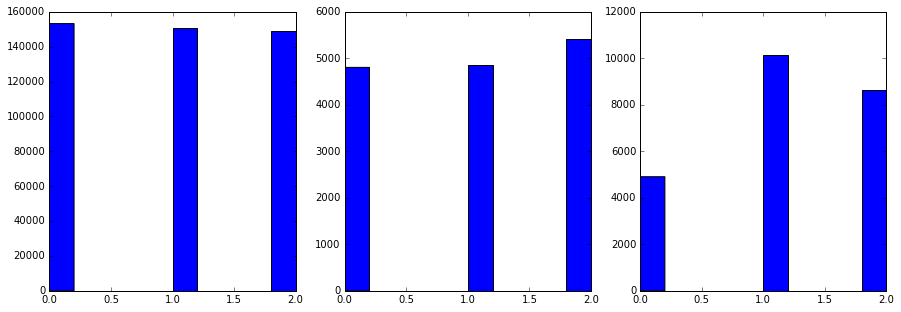

In [140]:
# plot the statistics of the folds
ii = 5#ifold
print 'Stats for the fold#',ifold
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)

traindb = DATADIR+'train_intensities'+str(ii)+'_.h5'
with h5py.File(traindb,'r') as f:
    # extract data from hdf file
    #data = f['data']
    labels = f['labels']
    axs[0].hist(labels)
    
validdb = DATADIR+'valid_intensities'+str(ii)+'_.h5'
with h5py.File(validdb,'r') as f:
    # extract data from hdf file
    #data = f['data']
    labels = f['labels']
    axs[1].hist(labels)
    
testdb = DATADIR+'test_intensities'+str(ii)+'_.h5'
with h5py.File(testdb,'r') as f:
    # extract data from hdf file
    #data = f['data']
    labels = f['labels']
    axs[2].hist(labels)

In [114]:
test_interval = int(nTrain/bSize)+1
outputFile = PROJECT_HOME+'solver.prototxt'
# copy to the .txt the absolute paths:
with open(outputFile, "w") as text_file:
    text_file.write('train_net:\"%s\"\n'%(PROJECT_HOME+'train_hdf5.prototxt'))
    text_file.write('test_net:\"%s\"\n'%(PROJECT_HOME+'val_hdf5.prototxt'))
    text_file.write('test_iter:%d\n'%(100))#nVal/bSize
    # Carry out testing every 500 training iterations.
    text_file.write('test_interval:%d\n'%(test_interval))
    # The base learning rate, momentum and the weight decay of the network.
    text_file.write('base_lr:%.3f\n'%(0.001))#0.001
    text_file.write('momentum:%.1f\n'%(0.9))
    #text_file.write('rms_decay:%.2f\n'%(0.02))
    text_file.write('momentum2:%.3f\n'%(0.999))#for Adam
    text_file.write('delta:%.10f\n'%(1e-8))#for Adam
    # regularization 
    text_file.write('weight_decay:%.4f\n'%(0.0005))
    # The learning rate policy
    #text_file.write('lr_policy:\"%s\"\n'%('inv'))
    text_file.write('lr_policy:\"%s\"\n'%('step'))
    text_file.write('gamma:%.4f\n'%(0.1))#0.0001
    #text_file.write('power:%.2f\n'%(0.75))
    text_file.write('stepsize:%d\n'%(test_interval*10))
    # Display every 100 iterations
    text_file.write('display:%d\n'%(100))
    # The maximum number of iterations
    text_file.write('max_iter:%d\n'%(50000))
    # snapshot intermediate results
    text_file.write('snapshot:%d\n'%(test_interval))
    text_file.write('snapshot_prefix:\"%s\"\n'%(PROJECT_HOME+'hdf5'))
    text_file.write('solver_mode:%s\n'%('GPU'))

In [115]:
print PROJECT_HOME
print nTrain,bSize,test_interval

/home/disk1/alfiia/carotid/composition/caffemodels5/trial_91113/fold_2/
444906.0 1000 445


In [116]:
caffe.set_device(1)
caffe.set_mode_gpu()
solver = caffe.AdamSolver(PROJECT_HOME+'solver.prototxt')

In [103]:
del solver

NameError: name 'solver' is not defined

In [117]:
solver.net.forward()  # train net
solver.test_nets[0].forward()  # test net (there can be more than one)

{'loss': array(1.092142939567566, dtype=float32)}

In [106]:
print solver.net.blobs['data13'].data.shape
print solver.net.blobs['labels'].data.shape

(1000, 1, 13, 13)
(1000,)


2.0


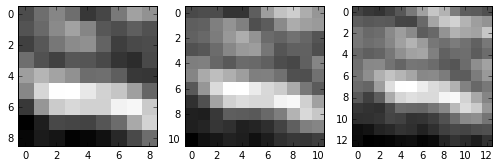

In [118]:
# we use a little trick to tile the first eight images
icase=2
c=1
fig, axs = plt.subplots(1,3)
fig.set_size_inches(8.5, 5.5)
axs[0].imshow(solver.net.blobs['data9'].data[icase, :c,:,:].transpose(1, 0, 2).reshape(9, c*9), cmap='gray',
      interpolation='nearest')
axs[1].imshow(solver.net.blobs['data11'].data[icase, :c,:,:].transpose(1, 0, 2).reshape(11, c*11), cmap='gray',
      interpolation='nearest')
axs[2].imshow(solver.net.blobs['data13'].data[icase, :c,:,:].transpose(1, 0, 2).reshape(13, c*13), cmap='gray',
      interpolation='nearest')
print solver.net.blobs['labels'].data[icase]

In [119]:
%%time
# bSize  = 1000
# niter = 1000
test_interval = int(nTrain/bSize)+1
niter = test_interval*25

# losses will also be stored in the log
train_loss = zeros(niter)
train_acc = zeros(int(np.ceil(niter / test_interval)))
test_acc = zeros(int(np.ceil(niter / test_interval)))
# output = zeros((niter, 8, 5))

# the main solver loop
for it in range(niter):
    solver.step(1)  # solver by Caffe

    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
    #solver.test_nets[0].forward(start='conv1_1')
    #output[it] = solver.test_nets[0].blobs['prob'].data[:8]
    
    # run a full test every so often
    if it % test_interval == 0:
        #print 'Iteration', it, ,'testing...'
        print 'Epoch', it // test_interval,'testing...'
        correct = 0
        for test_it in range(int(nVal/bSize)):
            solver.test_nets[0].forward()
            correct += 1.0*sum((solver.test_nets[0].blobs['fc4'].data.argmax(1))
                           == solver.test_nets[0].blobs['labels'].data)
        test_acc[it // test_interval] = correct / nVal
        
        correct = 0
        for test_it in range(int(nTrain/bSize)):
            solver.net.forward()
            correct += 1.0*sum((solver.net.blobs['fc4'].data.argmax(1))
                           == solver.net.blobs['labels'].data)
        train_acc[it // test_interval] = correct / nTrain
        print ('Loss: %.3f')%train_loss[it]
        print ('%.2f')%train_acc[it // test_interval]
        print ('%.2f')%test_acc[it // test_interval]
        
solver.snapshot()

Epoch 0 testing...
Loss: 1.277
0.40
0.30
Epoch 1 testing...
Loss: 0.518
0.79
0.66
Epoch 2 testing...
Loss: 0.472
0.80
0.68
Epoch 3 testing...
Loss: 0.445
0.80
0.70
Epoch 4 testing...
Loss: 0.442
0.81
0.70
Epoch 5 testing...
Loss: 0.468
0.81
0.69
Epoch 6 testing...
Loss: 0.469
0.81
0.69
Epoch 7 testing...


KeyboardInterrupt: 

In [97]:
print nTrain

444906.0


In [54]:
# solver.step(100)
icase = 4
print solver.net.blobs['labels'].data[icase]
print solver.net.blobs['fc3'].data[icase].argmax(0)

1.0
2


(3, 128)


(-0.5, 127.5, 2.5, -0.5)

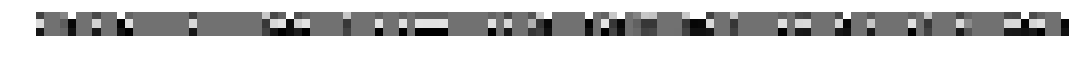

In [46]:
print solver.net.params['fc4'][0].diff.shape
fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
imshow(solver.net.params['fc4'][0].diff
            ,interpolation="nearest", cmap='gray'); axis('off')

(3, 128)


(-0.5, 127.5, 2.5, -0.5)

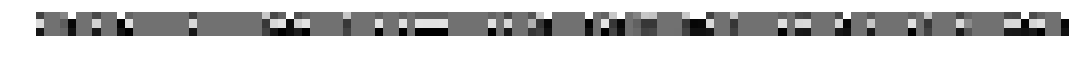

In [47]:
print solver.net.params['fc4'][0].diff.shape
fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
imshow(solver.net.params['fc4'][0].diff
            ,interpolation="nearest", cmap='gray'); axis('off')

(32, 3, 3)


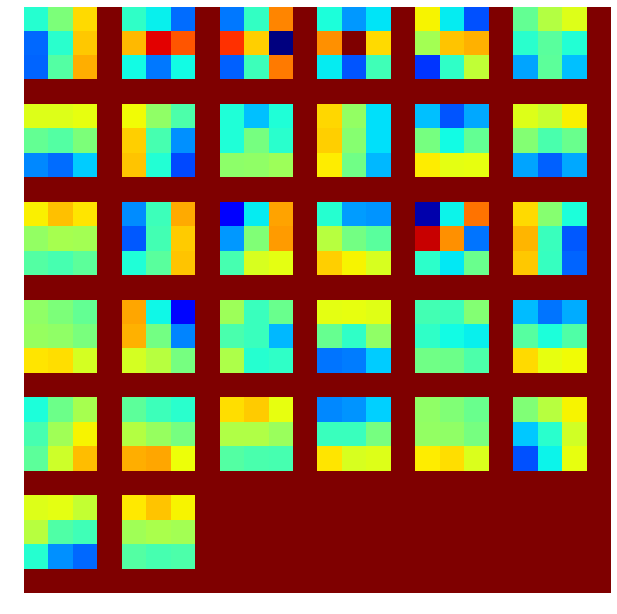

In [375]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data,interpolation="nearest"); plt.axis('off')
    
fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
# the parameters are a list of [weights, biases]
filters = solver.net.params['conv1'][0].data
print filters.transpose(0, 2, 3, 1)[:,:,:,0].shape
vis_square(filters.transpose(0, 2, 3, 1)[:,:,:,0])

-0.00717799 1.01535


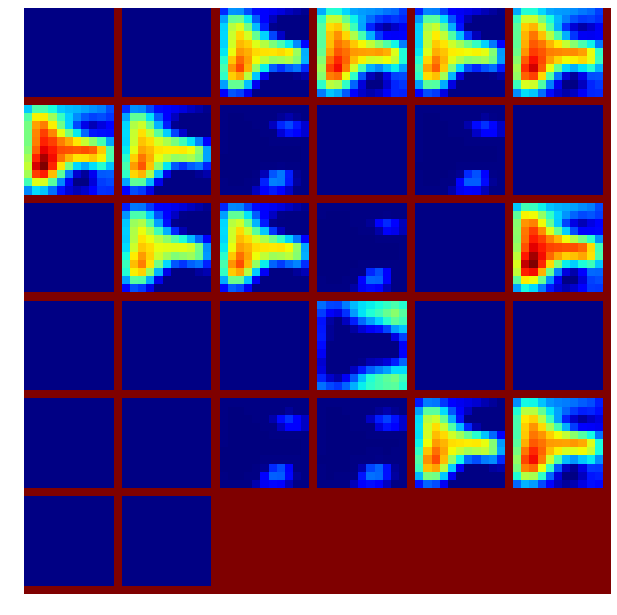

In [377]:
# feat = solver.net.blobs['conv1'].data[0, :34]
feat = solver.test_nets[0].blobs['conv4'].data[0, :34]

fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

vis_square(feat)
print np.min(feat), np.max(feat)
# plt.savefig('destination_path.eps', format='eps', dpi=1000) 

In [53]:
print nTrain

444906.0


In [54]:
print sum(solver.test_nets[0].blobs['labels'].data==solver.test_nets[0].blobs['fc3'].data.argmax(1))
print correct

18
341386.0


In [20]:
print train_loss[range(0,train_loss.shape[0],test_interval)]

[[ 0.53962111  0.54214263  0.54536778  0.56292278  0.52270305  0.55682689
   0.57193434  0.56261706  0.55624557  0.59824318  0.54642689  0.55703038
   0.55357337  0.54252928  0.53627616  0.58129692  0.53414589  0.56133056
   0.53644848  0.52141368  0.5783993   0.55405504  0.54924405  0.55364233
   0.56566733  0.59806746  0.52588928  0.57135373  0.54331106  0.56078106
   0.55110109  0.53376418  0.5171023   0.5394026   0.51007891]]


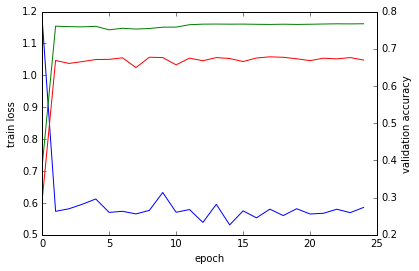

In [55]:
_, ax1 = subplots()
ax2 = ax1.twinx()
# ax1.plot(arange(niter), train_loss)
ax1.plot(arange(len(test_acc)), train_loss[range(0,train_loss.shape[0],test_interval)])
ax2.plot(arange(len(train_acc)), train_acc, 'g')
ax2.plot(arange(len(test_acc)), test_acc, 'r')
# ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('epoch')
ax1.set_ylabel('train loss')
ax2.set_ylabel('validation accuracy')

In [ ]:
# test accuracy


In [43]:
print PROJECT_HOME

/home/disk1/alfiia/carotid/composition/caffemodels/trial_15/fold_5/


In [170]:
ifold = 5
bSize = 1000
# PROJECT_HOME = '/home/disk1/alfiia/carotid/composition/caffemodels/trial_BN_11/fold_'+str(ifold)+'/'
MODEL_FILE = PROJECT_HOME+'test_hdf5.prototxt'

niter = test_interval*10
PRETRAINED = PROJECT_HOME+'hdf5_iter_%d.caffemodel'%(niter)#3440

In [171]:
outputFile = PROJECT_HOME+'test.txt'
# copy to the .txt the absolute paths:
with open(outputFile, "w") as text_file:
    text_file.write(DATADIR+'test_intensities%d_.h5'%(ifold))
    
with h5py.File(DATADIR+'test_intensities%d_.h5'%(ifold),'r') as patchFile:
    _datashape = patchFile.get('data1').shape
    N = _datashape[0]
    print N
    gt_labels = np.zeros(N)
    gt_labels[:] = patchFile.get('labels')
    print gt_labels

5493
[ 2.  0.  1. ...,  2.  2.  2.]


In [172]:
net_trained = caffe.Net(MODEL_FILE, PRETRAINED,caffe.TEST)

p_labels = np.array([0]*N)
for ibatch in range(0,N,bSize):
    out = net_trained.forward()
    predicted_label = np.array([0]*bSize)
    for i in range(bSize):
        predicted_label[i] = out['fc3'][i].argmax(0)
    p_labels[ibatch:min(ibatch+bSize,N)] = predicted_label[:min(ibatch+bSize,N)-ibatch]

In [173]:
print bSize,N
print 1.0*sum(p_labels==gt_labels)/N

1000 5493
0.773711997087


In [393]:
# batch the training:
nfolds=5
# losses will also be stored in the log
nepochs = 35
train_loss = zeros([nfolds,nepochs])
train_acc = zeros([nfolds,nepochs])
test_acc = zeros([nfolds,nepochs])
train_times = zeros(nfolds)

for ifold in range(1,nfolds+1):
    print 'ifold %d'%ifold
    PROJECT_HOME = '/home/disk1/alfiia/carotid/composition/caffemodels5/trial_15_/fold_'+str(ifold)+'/'
    if not os.path.isdir(PROJECT_HOME):
        os.makedirs(PROJECT_HOME)

    bSize = 1000

    with open(PROJECT_HOME + 'train_hdf5.prototxt', 'w') as f:
        string = str(net_15_(PROJECT_HOME + 'train.txt', bSize))
        f.write(string)
    with open(PROJECT_HOME + 'val_hdf5.prototxt', 'w') as f:
        string = str(net_15_(PROJECT_HOME + 'val.txt', bSize, btrain=True))
        f.write(string)
    with open(PROJECT_HOME + 'test_hdf5.prototxt', 'w') as f:
        string = str(net_15_(PROJECT_HOME + 'test.txt', bSize, btrain=False))
        f.write(string)

    # TRAIN+VAL cases: create train.txt and val.txt
    import os
    import preprocessor as prep

    print ifold
    outputFile = PROJECT_HOME+'train.txt'
    # copy to the .txt the absolute paths:
    with open(outputFile, "w") as text_file:
        #write:
        text_file.write(DATADIR+'train_intensities%d_.h5'%(ifold))

    outputFile = PROJECT_HOME+'val.txt'
    # copy to the .txt the absolute paths:
    with open(outputFile, "w") as text_file:
        text_file.write(DATADIR+'valid_intensities%d_.h5'%(ifold))

    # link the datasets
    traindb = DATADIR+'train_intensities'+str(ifold)+'_.h5'
    with h5py.File(traindb,'r') as f:
        # extract data from hdf file
        #data = f['data']
        labels = f['labels']
        n = f.get('labels').shape[0]

    nTrain = float32(n)
    print nTrain

    validdb = DATADIR+'valid_intensities'+str(ifold)+'_.h5'
    with h5py.File(validdb,'r') as f:
        # extract data from hdf file
        #data = f['data']
        labels = f['labels']
        n = f.get('labels').shape[0]
        print f.get('data15').shape

    nVal = float32(n)
    print nVal


    test_interval = int(nTrain/bSize)+1
    outputFile = PROJECT_HOME+'solver.prototxt'
    # copy to the .txt the absolute paths:
    with open(outputFile, "w") as text_file:
        text_file.write('train_net:\"%s\"\n'%(PROJECT_HOME+'train_hdf5.prototxt'))
        text_file.write('test_net:\"%s\"\n'%(PROJECT_HOME+'val_hdf5.prototxt'))
        text_file.write('test_iter:%d\n'%(test_interval))#nVal/bSize
        # Carry out testing every 500 training iterations.
        text_file.write('test_interval:%d\n'%(test_interval))
        # The base learning rate, momentum and the weight decay of the network.
        text_file.write('base_lr:%.3f\n'%(0.001))#0.001
        text_file.write('momentum:%.1f\n'%(0.9))
        #text_file.write('rms_decay:%.2f\n'%(0.02))
        text_file.write('momentum2:%.3f\n'%(0.999))#for Adam
        text_file.write('delta:%.10f\n'%(1e-8))#for Adam
        # regularization 
        text_file.write('weight_decay:%.4f\n'%(0.005))
        # The learning rate policy
        text_file.write('lr_policy:\"%s\"\n'%('inv'))
        #text_file.write('lr_policy:\"%s\"\n'%('step'))
        text_file.write('gamma:%.4f\n'%(0.0001))#0.0001
        text_file.write('power:%.2f\n'%(0.75))
        text_file.write('stepsize:%d\n'%(test_interval*10))
        # Display every 100 iterations
        text_file.write('display:%d\n'%(test_interval))
        # The maximum number of iterations
        text_file.write('max_iter:%d\n'%(test_interval*100))
        # snapshot intermediate results
        text_file.write('snapshot:%d\n'%(test_interval))
        text_file.write('snapshot_prefix:\"%s\"\n'%(PROJECT_HOME+'hdf5'))
        text_file.write('solver_mode:%s\n'%('GPU'))
    
    print PROJECT_HOME

    caffe.set_device(1)
    caffe.set_mode_gpu()
    solver = caffe.AdamSolver(PROJECT_HOME+'solver.prototxt')

    solver.net.forward()  # train net
    solver.test_nets[0].forward()  # test net (there can be more than one)


    tic()
    # bSize  = 1000
    # niter = 1000
    test_interval = int(nTrain/bSize)+1
    niter = test_interval*nepochs
    
#     # losses will also be stored in the log
#     train_loss = zeros([nfolds,niter])
#     train_acc = zeros([nfolds,int(np.ceil(niter / test_interval))])
#     test_acc = zeros([nfolds,int(np.ceil(niter / test_interval))])
#     train_times = zeros(nfolds)
    # output = zeros((niter, 8, 5))

    # the main solver loop
    for it in range(niter):
        solver.step(1)  # solver by Caffe

        # store the train loss
        #train_loss[ifold-1,it // test_interval] = solver.net.blobs['loss'].data

        # store the output on the first test batch
        # (start the forward pass at conv1 to avoid loading new data)
        #solver.test_nets[0].forward(start='conv1_1')
        #output[it] = solver.test_nets[0].blobs['prob'].data[:8]

        # run a full test every so often
        if it % test_interval == 0:
            #print 'Iteration', it, ,'testing...'
            print 'Epoch', it // test_interval,'testing...'
            correct = 0
            for test_it in range(int(nVal/bSize)):
                solver.test_nets[0].forward()
                correct += 1.0*sum((solver.test_nets[0].blobs['fc4'].data.argmax(1))
                               == solver.test_nets[0].blobs['labels'].data)
            test_acc[ifold-1,it // test_interval] = correct / nVal

            correct = 0
            for test_it in range(int(nTrain/bSize)):
                solver.net.forward()
                correct += 1.0*sum((solver.net.blobs['fc4'].data.argmax(1))
                               == solver.net.blobs['labels'].data)
            train_acc[ifold-1,it // test_interval] = correct / nTrain
            
            train_loss[ifold-1,it // test_interval] = solver.net.blobs['loss'].data
            print ('Loss: %.3f')%train_loss[ifold-1,it // test_interval]
            
            print ('%.2f')%train_acc[ifold-1,it // test_interval]
            print ('%.2f')%test_acc[ifold-1,it // test_interval]

    solver.snapshot()
    train_times[ifold-1]=toc()

ifold 1
1
501930.0
(18275, 1, 15, 15)
18275.0
/home/disk1/alfiia/carotid/composition/caffemodels5/trial_15_/fold_1/
Epoch 0 testing...
Loss: 1.081
0.37
0.30
Epoch 1 testing...
Loss: 0.560
0.76
0.78
Epoch 2 testing...
Loss: 0.555
0.76
0.78
Epoch 3 testing...
Loss: 0.554
0.76
0.79
Epoch 4 testing...
Loss: 0.514
0.76
0.78
Epoch 5 testing...
Loss: 0.535
0.76
0.78
Epoch 6 testing...
Loss: 0.538
0.76
0.79
Epoch 7 testing...
Loss: 0.543
0.76
0.78
Epoch 8 testing...
Loss: 0.560
0.76
0.79
Epoch 9 testing...
Loss: 0.536
0.76
0.78
Epoch 10 testing...
Loss: 0.525
0.76
0.79
Epoch 11 testing...
Loss: 0.589
0.76
0.78
Epoch 12 testing...
Loss: 0.526
0.76
0.79
Epoch 13 testing...
Loss: 0.529
0.76
0.78
Epoch 14 testing...
Loss: 0.557
0.76
0.79
Epoch 15 testing...
Loss: 0.518
0.76
0.78
Epoch 16 testing...
Loss: 0.560
0.76
0.79
Epoch 17 testing...
Loss: 0.551
0.76
0.79
Epoch 18 testing...
Loss: 0.502
0.76
0.78
Epoch 19 testing...
Loss: 0.569
0.76
0.79
Epoch 20 testing...
Loss: 0.549
0.76
0.78
Epoch 21 tes

In [394]:
tic()
print zeros([nfolds,niter]).shape
t = toc()
print PROJECT_HOME
np.savez(('%s//..//stats.npz')%(PROJECT_HOME),
         train_times=train_times,train_acc=train_acc,test_acc=test_acc,train_loss=train_loss)

(5, 15890)
Elapsed time is 0.00036096572876 seconds.
/home/disk1/alfiia/carotid/composition/caffemodels5/trial_15_/fold_5/


In [395]:
logs = np.load(('%s//..//stats.npz')%(PROJECT_HOME))
print logs #,train_acc,test_acc,train_loss
with np.load(('%s//..//stats.npz')%(PROJECT_HOME)) as data:
    print data.keys()
    train_times=data['train_times']
    train_acc=data['train_acc']
    test_acc=data['test_acc']
    train_loss=data['train_loss']

['train_acc', 'test_acc', 'train_loss', 'train_times']


In [396]:
print train_times/60

[ 50.60818752  44.97992405  51.72287798  49.85104855  45.75369677]


44.979924051 minutes


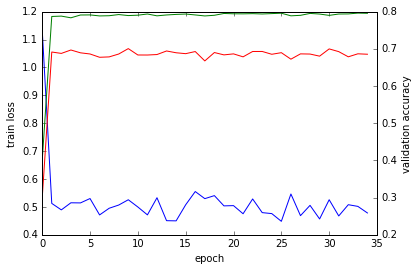

In [397]:
# view the stats for a fold
ifold = 1
_, ax1 = subplots()
ax2 = ax1.twinx()
# ax1.plot(arange(niter), train_loss)
ax1.plot(arange(len(test_acc[ifold,...])), train_loss[ifold,:])
ax2.plot(arange(len(train_acc[ifold,:])), train_acc[ifold,:], 'g')
ax2.plot(arange(len(test_acc[ifold,:])), test_acc[ifold,:], 'r')
# ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('epoch')
ax1.set_ylabel('train loss')
ax2.set_ylabel('validation accuracy')
print train_times[ifold]/60,'minutes'

In [401]:
# perform the test
test_times = zeros(nfolds)
for ifold in range(1,6):
    tic()
    bSize = 1000

    DATADIR = '/home/disk1/alfiia/carotid/composition/5/'
    # fold db size
    traindb = DATADIR+'train_intensities'+str(ifold)+'_.h5'
    with h5py.File(traindb,'r') as f:
        # extract data from hdf file
        #data = f['data']
        labels = f['labels']
        n = f.get('labels').shape[0]

    nTrain = float32(n)
    print nTrain

    test_interval = int(nTrain/bSize)+1
    niter = test_interval*35

    PROJECT_HOME = '/home/disk1/alfiia/carotid/composition/caffemodels5/trial_13_w.005/fold_'+str(ifold)+'/'
    MODEL_FILE = PROJECT_HOME+'test_hdf5.prototxt'

    PRETRAINED = PROJECT_HOME+'hdf5_iter_%d.caffemodel'%(niter)
    print PRETRAINED
    outputFile = PROJECT_HOME+'test.txt'
    # copy to the .txt the absolute paths:
    with open(outputFile, "w") as text_file:
        text_file.write(DATADIR+'test_intensities%d_.h5'%(ifold))

    with h5py.File(DATADIR+'test_intensities%d_.h5'%(ifold),'r') as patchFile:
        _datashape = patchFile.get('data1').shape
        N = _datashape[0]
        print N
        gt_labels = np.zeros(N)
        gt_labels[:] = patchFile.get('labels')
        print gt_labels

        net_trained = caffe.Net(MODEL_FILE, PRETRAINED,caffe.TEST)

    p_labels = np.array([0]*N)
    p_scores = np.zeros([3,N])
    print p_scores.shape
    for ibatch in range(0,N,bSize):
        out = net_trained.forward()
        predicted_label = np.array([0]*bSize)
        predicted_scores = np.zeros([3,bSize])
        for i in range(bSize):
            predicted_label[i] = out['fc4'][i].argmax(0)
            predicted_scores[:,i] = out['fc4'][i]

        p_labels[ibatch:min(ibatch+bSize,N)] = predicted_label[:min(ibatch+bSize,N)-ibatch]
        print predicted_scores[:,range(0,min(ibatch+bSize,N)-ibatch)].shape
        p_scores[:,ibatch:min(ibatch+bSize,N)] = predicted_scores[:,range(0,min(ibatch+bSize,N)-ibatch)]
        

    print bSize,N
    Acc = 1.0*sum(p_labels==gt_labels)/N
    print Acc

    outputFileName = PROJECT_HOME+'../test/result_%d.h5'%(ifold)
    if not os.path.isdir(PROJECT_HOME+'../test/'):
        os.makedirs(PROJECT_HOME+'../test/')
    with h5py.File(outputFileName,'w') as outFile:
                    _data = outFile.create_dataset('labels', data = p_labels, dtype='float32',compression="gzip")
                    _scores = outFile.create_dataset('scores', data = p_scores, dtype='float32',compression="gzip")
    test_times[ifold-1]=toc()

501930.0
/home/disk1/alfiia/carotid/composition/caffemodels5/trial_13_w.005/fold_1/hdf5_iter_17570.caffemodel
15077
[ 2.  2.  1. ...,  2.  2.  2.]
(3, 15077)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 77)
1000 15077
0.739205412217
Elapsed time is 0.826014995575 seconds.
444906.0
/home/disk1/alfiia/carotid/composition/caffemodels5/trial_13_w.005/fold_2/hdf5_iter_15575.caffemodel
18275
[ 2.  0.  0. ...,  0.  0.  0.]
(3, 18275)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 275)
1000 18275
0.790095759234
Elapsed time is 0.858946084976 seconds.
513432.0
/home/disk1/alfiia/carotid/composition/caffemodels5/trial_13_w.005/fold_3/hdf5_iter_17990.caffemodel
21413
[ 2.  2.  2. ...,  2.  2.  2.]
(3, 21413)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
(3, 100

In [386]:
print test_times

[ 0.57624388  0.63413382  0.77354217  0.37794518  0.81154084]


15077
[ 2.  2.  1. ...,  2.  2.  2.]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ 2.  2.  1. ...,  0.  0.  2.]
18275
[ 2.  0.  0. ...,  0.  0.  0.]
[ 11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.]
[ 2.  2.  2. ...,  0.  0.  0.]
21413
[ 2.  2.  2. ...,  2.  2.  2.]
[ 22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.]
[ 0.  0.  0. ...,  1.  1.  1.]
10661
[ 0.  2.  0. ...,  2.  1.  1.]
[ 33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.]
[ 0.  0.  0. ...,  0.  0.  0.]
23696
[ 0.  1.  2. ...,  1.  2.  1.]
[ 44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.]
[ 0.  2.  2. ...,  1.  2.  2.]
0.751
[ 0.91566265  0.93855219  0.91923077  0.7890411   0.95620438  0.84701912
  0.53333333  0.87989556  0.50441906  0.80670786  0.82222222  0.35574572
  0.61403509  0.98030635  0.93007916  0.62743823  0.76435045  0.95330739
  0.91365777  0.85610708  0.71372106  0.82860825  0.59087719  0.66343042
  0.42967245  0.90188285  0.5890411   0.70114123  0.68137255  0.68274112

{'boxes': [<matplotlib.lines.Line2D at 0x7f30ca294550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f30ca2a1490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f30ca2ac790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f30ca2ac150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f30ca294750>,
  <matplotlib.lines.Line2D at 0x7f30ca294e10>]}

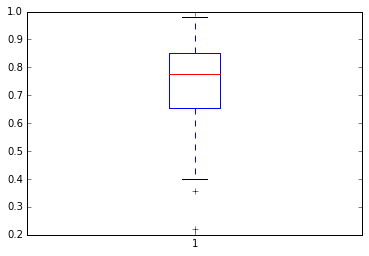

In [402]:

L = []
GT = []
C = []
for ifold in range(1,6):
    # get the test patches
    with h5py.File(DATADIR+'test_intensities%d_.h5'%(ifold),'r') as patchFile:
        _datashape = patchFile.get('data1').shape
        N = _datashape[0]
        print N
        gt_labels = np.zeros(N)
        gt_labels[:] = patchFile.get('labels')
        GT.extend(gt_labels)
        print gt_labels
        cases = np.zeros(N)
        cases[:] = patchFile.get('cases')
        print unique(cases)
        C.extend(cases)
        
    # get the results
    PROJECT_HOME = '/home/disk1/alfiia/carotid/composition/caffemodels5/trial_13_w.005/fold_'+str(ifold)+'/'
    outputFileName = PROJECT_HOME+'../test/result_%d.h5'%(ifold)
    with h5py.File(outputFileName,'r') as outFile:
        labels = np.zeros(N)
        labels[:] = outFile.get('labels')
        print labels
        L.extend(labels)


# evaluate
#patchwise accuracy:
print ('%.3f')%(1.0*sum(GT==int8(L))/len(GT)) 
#casewise accuracy
acc_case = np.zeros(56)
for icase in range(56):
    inds = [i for i in range(len(C)) if C[i] == icase]
    #print inds
    GT_i = [GT[i] for i in range(len(C)) if C[i] == icase]
    L_i = [L[i] for i in range(len(C)) if C[i] == icase]
    acc_case[icase] = (1.0*sum(GT_i==int8(L_i))/len(inds))
    
print acc_case
print median(acc_case), mean(acc_case)
boxplot(acc_case)

In [227]:
acc13 = acc_case

In [340]:
print median(acc_case), median(acc13)

0.770565286996 0.778237771791


0.00340425893799


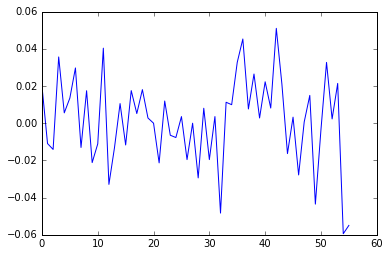

In [339]:
plot(acc_case-acc13)
print median(acc_case-acc13)

In [309]:
from scipy.stats import mannwhitneyu, ttest_ind
u,pvalue = mannwhitneyu(acc_case, acc13)
print pvalue
tstat,pvalue = ttest_ind(acc_case, acc13)
print pvalue

0.845437382381
0.876814678663


In [403]:
print PROJECT_HOME
np.savez(('%s//..//test_stats.npz')%(PROJECT_HOME),
         test_times = test_times, acc_case = acc_case)

/home/disk1/alfiia/carotid/composition/caffemodels5/trial_13_w.005/fold_5/


In [89]:
# load the trained net
for ifold in [5]:
    bSize = 1000

    DATADIR = '/home/disk1/alfiia/carotid/composition/h5/'
    # fold db size
    traindb = DATADIR+'train_intensities'+str(ifold)+'_.h5'
    with h5py.File(traindb,'r') as f:
        # extract data from hdf file
        #data = f['data']
        labels = f['labels']
        n = f.get('labels').shape[0]

    nTrain = float32(n)
    print nTrain

    test_interval = int(nTrain/bSize)+1
    niter = test_interval*20

    PROJECT_HOME = '/home/disk1/alfiia/carotid/composition/caffemodels/trial_BN_15_0/fold_'+str(ifold)+'/'
    MODEL_FILE = PROJECT_HOME+'test_hdf5.prototxt'

    PRETRAINED = PROJECT_HOME+'hdf5_iter_%d.caffemodel'%(niter)
    print PRETRAINED
    outputFile = PROJECT_HOME+'test.txt'
    # copy to the .txt the absolute paths:
    with open(outputFile, "w") as text_file:
        text_file.write(DATADIR+'test_intensities%d_.h5'%(ifold))

    with h5py.File(DATADIR+'test_intensities%d_.h5'%(ifold),'r') as patchFile:
        _datashape = patchFile.get('data1').shape
        N = _datashape[0]
        print N
        gt_labels = np.zeros(N)
        gt_labels[:] = patchFile.get('labels')
        print gt_labels

        net_trained = caffe.Net(MODEL_FILE, PRETRAINED,caffe.TEST)

73140.0
/home/disk1/alfiia/carotid/composition/caffemodels/trial_BN_15_0/fold_5/hdf5_iter_1480.caffemodel
5493
[ 2.  0.  1. ...,  2.  2.  2.]


(32, 3, 3)


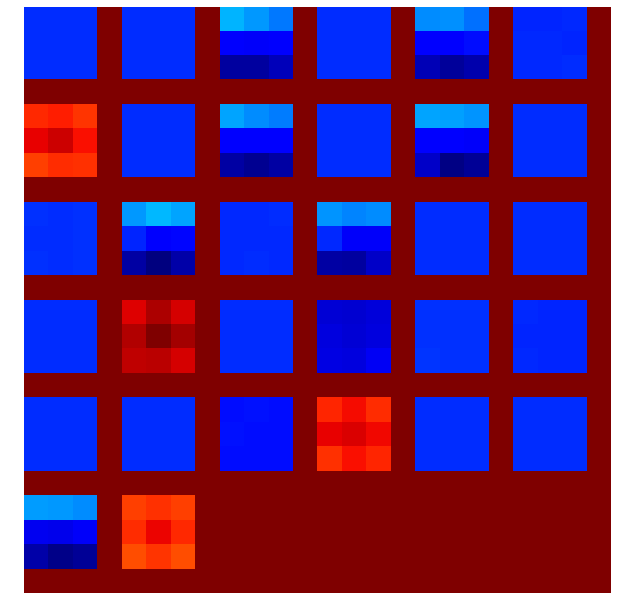

In [312]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data,interpolation="nearest",cmap="jet"); plt.axis('off')
    
#     plt.savefig('/home/alfiia/images/filters11.png', format='png', dpi=300)
    
fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
# the parameters are a list of [weights, biases]
filters = net_trained.params['conv4'][0].data
print filters.transpose(0, 2, 3, 1)[:,:,:,0].shape
vis_square(filters.transpose(0, 2, 3, 1)[:,:,:,0])


In [8]:
net_trained.forward()

{'fc3': array([[ 1.45032787, -1.79868543,  0.6008867 ],
        [ 1.25866163, -1.73631966,  0.73132181],
        [ 1.28559709, -1.7519834 ,  0.72131956],
        ..., 
        [-4.56740236,  3.23872232,  1.20884848],
        [-4.51137018,  3.16070461,  1.2407347 ],
        [-4.44048452,  3.07057619,  1.27060306]], dtype=float32),
 'labels': array([ 2.,  0.,  1.,  0.,  2.,  2.,  1.,  2.,  2.,  0.,  0.,  0.,  2.,
         2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  1.,  1.,
         2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,
         0.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  2.,
         0.,  0.,  2.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  0.,
         1.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
 

0.0
[[ 1.45032787 -1.79868543  0.6008867 ]
 [ 1.25866163 -1.73631966  0.73132181]
 [ 1.28559709 -1.7519834   0.72131956]
 ..., 
 [-4.56740236  3.23872232  1.20884848]
 [-4.51137018  3.16070461  1.2407347 ]
 [-4.44048452  3.07057619  1.27060306]]


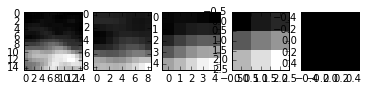

In [9]:
# we use a little trick to tile the first eight images
icase=1
c=1

fig, axs = plt.subplots(1,5)

axs[0].imshow(net_trained.blobs['data15'].data[icase, :c,:,:].transpose(1, 0, 2).reshape(15, c*15), cmap='gray',
      interpolation='nearest')
print net_trained.blobs['labels'].data[icase]

axs[1].imshow(net_trained.blobs['conv1'].data[0, :c,:,:].transpose(1, 0, 2).reshape(9, c*9), cmap='gray',
       interpolation='nearest')

axs[2].imshow(net_trained.blobs['conv2'].data[0, :c,:,:].transpose(1, 0, 2).reshape(5, c*5), cmap='gray',
       interpolation='nearest')

axs[3].imshow(net_trained.blobs['conv3'].data[0, :c,:,:].transpose(1, 0, 2).reshape(3, c*3), cmap='gray',
       interpolation='nearest')

axs[4].imshow(net_trained.blobs['conv4'].data[0, :c,:,:].transpose(1, 0, 2).reshape(1, c*1), cmap='gray',
       interpolation='nearest')

print net_trained.blobs['fc3'].data[:]

In [10]:
caffe.draw_net(net_trained)

AttributeError: 'module' object has no attribute 'draw_net'

In [11]:
print net_trained.params['conv1'][0].diff[:, 0].shape
imshow(net_trained.params['conv1'][0].diff[:, 0].reshape(4, 8, 5, 5)
       .transpose(0, 2, 1, 3).reshape(4*5, 8*5), cmap='gray')

(64, 7, 7)


ValueError: total size of new array must be unchanged

540.077


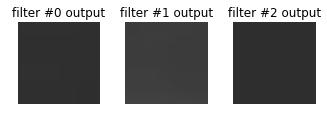

In [12]:

# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    print net.blobs['conv1'].data.max()
    filt_min, filt_max = net.blobs['conv1'].data.min(), net.blobs['conv1'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv1'].data[0, i], vmin=filt_min, vmax=filt_max, cmap='gray')
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net_trained)

